# Exploratory Data Analysis - Intro to Pandas
Welcome to the Pandas tutorial lab. This is the first notebook of the exploratory data analysis (EDA) series, where you will get your hands dirty applying the skills you have learned in the course on an actual data problem, similar to those you might encouter in real life! Here you will see and try out some basics of Pandas and get familiar with some of the useful functions that you will use across the other labs and assignments. If you already know Pandas well, feel free to skip this notebook.

For the demonstration purposes you will use the [World Happiness Report](https://worldhappiness.report/) dataset. The dataset consists of 2199 rows, where each row contains various hapiness-related metrics for a certain country in a given year. Right now you'll just use this dataset to understand some fundamental operations in Pandas. You will see this dataset again later in week 3, where you will dig deeper into the data and explore relationships to better understand which factors seem to best predict happiness.

This notebook is not a comprehensive guide to Pandas, but rather shows and explains the functions you will use through this course. For a more comprehensive guide on Pandas, please see the [official tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) or check the documentation.

# 1. Importing the Libraries
The most important library you will need in this notebook is - you guessed it - `Pandas`. You will also use the `Seaborn` library for plotting the data. To import the libraries run the cell below.

In [13]:
# Import the Pandas library
import pandas as pd
# Import the Seaborn library for plotting
#!pip install seaborn
import seaborn as sns

# 2. Importing the Data
Now that you have the pandas library imported, you'll need to load your dataset. The dataset you will use is saved as a `.csv` file and all you need to do to load is call the function `pd.read_csv(filename)`. If you have your data in another format, there exists a variety of functions to load it, you can check the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).
When you load the dataset, it will be stored as a `DataFrame` type (see the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)). This is the most commonly used Pandas datastructure that you will use throughout this and other notebooks.

In [14]:
# Load the dataset with 'windows-1252' encoding and save it to the df variable
try:
    df = pd.read_csv('C:/Users/jiya jain/OneDrive/Desktop/jupyter/data/world_happiness_report.csv', encoding='windows-1252', index_col=False)
    print("File loaded successfully with windows-1252 encoding.")
except UnicodeDecodeError:
    print("windows-1252 encoding failed.")

    
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df = df.dropna(how="all")


File loaded successfully with windows-1252 encoding.


# 3. Basic Operations With a Dataframe

## 3.1 View the Dataframe
You can use `DataFrame.head()` and `DataFrame.tail()` to view the first or last rows of the frame respectively. By default it will show you five rows, but you can specify the number of rows you want to see as a parameter. Technically, neither of the functions actually display anything, but just return a new dataframe. The dataframe is displayed because Jupyter notebooks show the output of the last row in the cell. You can also display the contents of your dataframe by simply writing `df`. If your dataframe is too long, it will then display only the first and the last few rows.

Note that all of this only works if you use it in the last line of code in the cell, because the cells automatically display the output of the last line. If you want to see more than one dataframe by running a single cell or if you want to perform some other tasks after displaying the dataframe, then you better encapsulate it with `print()` or `display()`. `display()` function will print the dataframe, but with the same format as just calling `df`, whereas `print()` will print as plain text. 

Try commenting and uncommenting lines below, to see how this plays out. Try different combiations of rows.

In [15]:
# This line will display the first few rows of the dataframe if there are no lines of code after.
df.head()

# Try uncommenting different combinations of the lines below.
# print("Cats are cool.")
# print(df.head())
# print(df)
# # print("Some more text about cats being cool.")
# # display(df)

,ï»¿Year,Rank,Country name,Life evaluation (3-year average),Lower whisker,Upper whisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024.0,147.0,Afghanistan,1.364,1.301,1.427,0.649,0.0,0.155,0.0,0.075,0.135,0.348
1,2023.0,143.0,Afghanistan,1.721,1.667,1.775,0.628,0.0,0.242,0.0,0.091,0.088,0.672
2,2022.0,137.0,Afghanistan,1.859,1.795,1.923,0.645,0.0,0.087,0.0,0.093,0.059,0.976
3,2021.0,146.0,Afghanistan,2.404,2.339,2.469,0.758,0.0,0.289,0.0,0.089,0.005,1.263
4,2020.0,150.0,Afghanistan,2.523,2.449,2.596,0.370,0.0,0.126,0.0,0.122,0.010,1.895


Now display the last few rows of the dataframe. Pay attention to the additional parameter that specifies the number of rows.

In [16]:
# This line will display only the last two rows of the dataframe.
df.tail(12)

,ï»¿Year,Rank,Country name,Life evaluation (3-year average),Lower whisker,Upper whisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
1957,2023.0,138.0,Zimbabwe,3.341,3.226,3.457,0.748,0.850,0.232,0.487,0.096,0.131,0.797
1958,2022.0,134.0,Zimbabwe,3.204,3.084,3.323,0.758,0.881,0.069,0.363,0.112,0.117,0.905
1959,2021.0,144.0,Zimbabwe,2.995,2.880,3.110,0.947,0.690,0.270,0.329,0.106,0.105,0.548
1960,2020.0,149.0,Zimbabwe,3.145,3.030,3.259,0.457,0.649,0.243,0.359,0.157,0.075,1.205
1961,2019.0,151.0,Zimbabwe,3.299,3.184,3.414,0.426,1.048,0.375,0.377,0.151,0.081,0.841
1962,2018.0,146.0,Zimbabwe,3.663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,2017.0,144.0,Zimbabwe,3.692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,2016.0,138.0,Zimbabwe,3.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,2015.0,131.0,Zimbabwe,4.193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,2014.0,115.0,Zimbabwe,4.610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.2 Index and Column Names
In the `DataFrame`, the data is stored in a two dimensional grid (rows and columns). The rows are indexed and the columns are named. To see the index or the column names, you can use `DataFrame.index` or `DataFrame.columns` respectively.

In [17]:
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968],
      dtype='int64', length=1969)

As you can see, the index is a range of numbers between 0 (inclusive) and 2199 (not inclusive).

Run the cell below to see the column names.

In [18]:
df.columns

Index(['ï»¿Year', 'Rank', 'Country name', 'Life evaluation (3-year average)',
       'Lower whisker', 'Upper whisker', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

The column names are saved as strings. As you can see, they can include spaces. This can lead to difficulties when accessing the columns (you will see this very soon), so it is a good idea to rename them to get rid of the spaces. A common practice is to replace them with underscores. To rename the columns, you can use `DataFrame.rename()` and pass the columns you want to rename in a dictionary.

In the next example, you will see how you can automatically replace all spaces with underscores

In [24]:
# A dictionary mapping old column names to new column names. In addition to replacing spaces
# with underscores, you will make all of the text lowercase.
columns_to_rename = {i: "_".join(i.split(" ")).lower() for i in df.columns}
# Note that this dictionary is created automatically from the column names.
# You can also create it by hand and rename only the columns you want to rename
# For example, see the commented line below:
# columns_to_rename = {"Country name": "country_name", "Life Ladder": "life_ladder"}

# Rename the columns

# Rename the first column (index 0) regardless of what the symbols are
df.columns.values[0] = 'year'
df.rename(columns={"life_evaluation_(3-year_average)":"life_ladder"},inplace=True)
# Check the results
df.head()

,year,rank,country_name,life_ladder,lower_whisker,upper_whisker,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
0,2024.0,147.0,Afghanistan,1.364,1.301,1.427,0.649,0.0,0.155,0.0,0.075,0.135,0.348
1,2023.0,143.0,Afghanistan,1.721,1.667,1.775,0.628,0.0,0.242,0.0,0.091,0.088,0.672
2,2022.0,137.0,Afghanistan,1.859,1.795,1.923,0.645,0.0,0.087,0.0,0.093,0.059,0.976
3,2021.0,146.0,Afghanistan,2.404,2.339,2.469,0.758,0.0,0.289,0.0,0.089,0.005,1.263
4,2020.0,150.0,Afghanistan,2.523,2.449,2.596,0.370,0.0,0.126,0.0,0.122,0.010,1.895


## 3.3 Data Types
One cool thing about the DataFrame type is that the columns of the resulting DataFrame can have different `dtypes`. This is something you simply can not do with a Numpy array. You can look at them and if needed to you can change them.

In [25]:
df.dtypes

year                                          float64
rank                                          float64
country_name                                   object
life_ladder                                   float64
lower_whisker                                 float64
upper_whisker                                 float64
explained_by:_log_gdp_per_capita              float64
explained_by:_social_support                  float64
explained_by:_healthy_life_expectancy         float64
explained_by:_freedom_to_make_life_choices    float64
explained_by:_generosity                      float64
explained_by:_perceptions_of_corruption       float64
dystopia_+_residual                           float64
dtype: object

You can see that the columns above are of different types and if you compare it to how the data actually looks like, it seems that the types are correct. Sometimes if your data is incorrectly formatted, the imported types will be wrong. In this case you will want to change the types of the columns manually before proceeding. Check the code below on how you can do that. Note that nothing will change after running the code below, as the data is already of correct types.

In [26]:
# List all of the columns that should be floats
float_columns = [i for i in df.columns if i not in  ["country_name", "year"]]
# Change the type of all float columns to float
df = df.astype({i: float for i in float_columns})
# Show the types of all columns
df.dtypes

year                                          float64
rank                                          float64
country_name                                   object
life_ladder                                   float64
lower_whisker                                 float64
upper_whisker                                 float64
explained_by:_log_gdp_per_capita              float64
explained_by:_social_support                  float64
explained_by:_healthy_life_expectancy         float64
explained_by:_freedom_to_make_life_choices    float64
explained_by:_generosity                      float64
explained_by:_perceptions_of_corruption       float64
dystopia_+_residual                           float64
dtype: object

The `df.info()` provides some additional information. In addition to data types it also tells you the number of non-null values per column.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1969 entries, 0 to 1968
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   year                                        1969 non-null   float64
 1   rank                                        1969 non-null   float64
 2   country_name                                1969 non-null   object 
 3   life_evaluation_(3-year_average)            1969 non-null   float64
 4   lower_whisker                               875 non-null    float64
 5   upper_whisker                               875 non-null    float64
 6   explained_by:_log_gdp_per_capita            872 non-null    float64
 7   explained_by:_social_support                872 non-null    float64
 8   explained_by:_healthy_life_expectancy       870 non-null    float64
 9   explained_by:_freedom_to_make_life_choices  871 non-null    float64
 10  explained_by:_gen

## 3.4 Selecting Columns
One way of selecting a single column is to use `DataFrame.column_name`. Here you can see why it was a good idea that you renamed the columns to not include any whitespaces. This returns a Pandas `Series`, which is a different datatype from a `DataFrame`. You will see how to return a `DataFrame` a bit later.

In [27]:
# Select the life_ladder column and store it in x
x =  df.life_ladder

print(f"type(x):\n {type(x)}\n")
print(f"x:\n{x}")

type(x):
 <class 'pandas.core.series.Series'>

x:
0       1.364
1       1.721
2       1.859
3       2.404
4       2.523
        ...  
1964    3.875
1965    4.193
1966    4.610
1967    4.827
1968    3.978
Name: life_ladder, Length: 1969, dtype: float64


Another way to do this is to use square brackets and the name of the column in quortes, much as you would do when accessing an entry in a dictionary. As with dictionaries, you can use double quotes or simple quotes. 

In [28]:
x = df["life_ladder"]

print(f"type(x):\n {type(x)}\n")
print(f"x:\n{x}")

type(x):
 <class 'pandas.core.series.Series'>

x:
0       1.364
1       1.721
2       1.859
3       2.404
4       2.523
        ...  
1964    3.875
1965    4.193
1966    4.610
1967    4.827
1968    3.978
Name: life_ladder, Length: 1969, dtype: float64


Passing a list of labels rather than a single label selects the columns and returns a DataFrame (rather than a Series), with only the selected columns. You can use it to select one or more columns.

In [29]:
# x = df[["life_ladder"]]
x = df[["life_ladder", "year"]]

print(f"type(x):\n {type(x)}\n")
print(f"x:\n{x}")

type(x):
 <class 'pandas.core.frame.DataFrame'>

x:
      life_ladder    year
0           1.364  2024.0
1           1.721  2023.0
2           1.859  2022.0
3           2.404  2021.0
4           2.523  2020.0
...           ...     ...
1964        3.875  2016.0
1965        4.193  2015.0
1966        4.610  2014.0
1967        4.827  2012.0
1968        3.978  2011.0

[1969 rows x 2 columns]


## 3.5 Selecting Rows
Passing a slice `:` selects matching rows and returns a DataFrame with all columns in your original dataframe.

In [30]:
df[2:5]
df[3:18]

,year,rank,country_name,life_ladder,lower_whisker,upper_whisker,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
3,2021.0,146.0,Afghanistan,2.404,2.339,2.469,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2020.0,150.0,Afghanistan,2.523,2.449,2.596,0.370,0.000,0.126,0.000,0.122,0.010,1.895
5,2019.0,153.0,Afghanistan,2.567,2.506,2.628,0.301,0.356,0.266,0.000,0.135,0.001,1.507
6,2018.0,154.0,Afghanistan,3.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017.0,145.0,Afghanistan,3.632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016.0,141.0,Afghanistan,3.794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015.0,154.0,Afghanistan,3.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2014.0,153.0,Afghanistan,3.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2012.0,143.0,Afghanistan,4.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2011.0,131.0,Afghanistan,4.258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.6 Iterating Over Rows
If you want to iterate over the rows, you can use the `.iterrows()` method. For each row it yields a (index, row) tuple, where the row is a `Series` object containing the data. Note that this does not preserve the data types (dtypes) across the rows (dtypes are preserved across columns for DataFrames).

In [31]:
index, row = next(df.iterrows())
row

year                                               2024.0
rank                                                147.0
country_name                                  Afghanistan
life_ladder                                         1.364
lower_whisker                                       1.301
upper_whisker                                       1.427
explained_by:_log_gdp_per_capita                    0.649
explained_by:_social_support                          0.0
explained_by:_healthy_life_expectancy               0.155
explained_by:_freedom_to_make_life_choices            0.0
explained_by:_generosity                            0.075
explained_by:_perceptions_of_corruption             0.135
dystopia_+_residual                                 0.348
Name: 0, dtype: object

## 3.7 Boolean Indexing
Now to the more fun part. If you looked carefully at the dataset that was displayed above, you probably saw that the datapoints are available for different years. What if you are interested only in data from a certain year? Or from a certain country? Or perhaps where a value in a certain column is greater than some predetermined value? You can use boolean indexing.

Run the cell below to select rows where the year equals to 2022. Try to uncomment some other row to see what it does.

In [32]:
df[df["rank"] < 20]
# df[df["life_ladder"] > 5] # Select rows where life_ladder > 5
# df[df["life_ladder"] > 11] # This one should return an empty dataframe

,year,rank,country_name,life_ladder,lower_whisker,upper_whisker,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
71,2024.0,11.0,Australia,6.974,6.890,7.057,1.767,1.647,0.841,0.857,0.164,0.285,1.413
72,2023.0,10.0,Australia,7.057,6.973,7.141,1.854,1.461,0.692,0.756,0.225,0.323,1.745
73,2022.0,12.0,Australia,7.095,7.009,7.180,1.899,1.497,0.532,0.677,0.242,0.310,1.938
74,2021.0,12.0,Australia,7.162,7.081,7.244,1.900,1.203,0.772,0.676,0.258,0.341,2.011
75,2020.0,12.0,Australia,7.183,7.102,7.265,1.453,1.076,0.801,0.647,0.291,0.317,2.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,2015.0,13.0,United States,7.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1876,2014.0,15.0,United States,7.119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1877,2012.0,17.0,United States,7.082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1878,2011.0,11.0,United States,7.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that now that you selected only the certain rows, the index column does not make much sense anymore because you have a lot of gaps. While this is not a problem, in some cases you might want the index to correspond to the actual row number. To achieve this you can use `reset_inex()`. In other cases you might want to keep the index as it is to more easily refer back to the original dataframe. It all depends on the context of your project. Run the cell below to reset the index and take a look at the output.

In [33]:
new_df = df[df["year"] == 2022]
new_df = new_df.reset_index(drop=True)
new_df

,year,rank,country_name,life_ladder,lower_whisker,upper_whisker,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
0,2022.0,137.0,Afghanistan,1.859,1.795,1.923,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,2022.0,83.0,Albania,5.277,5.148,5.406,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,2022.0,81.0,Algeria,5.329,5.207,5.451,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,2022.0,52.0,Argentina,6.024,5.900,6.147,1.590,1.388,0.427,0.587,0.088,0.082,1.861
4,2022.0,79.0,Armenia,5.342,5.213,5.470,1.466,1.134,0.443,0.551,0.053,0.160,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2022.0,54.0,Uzbekistan,6.014,5.899,6.130,1.227,1.347,0.375,0.740,0.260,0.208,1.856
133,2022.0,88.0,Venezuela,5.211,5.085,5.336,0.000,1.257,0.341,0.369,0.205,0.084,2.955
134,2022.0,65.0,Viet Nam,5.763,5.662,5.865,1.349,1.212,0.381,0.741,0.134,0.122,1.824
135,2022.0,128.0,Zambia,3.982,3.797,4.167,0.914,0.890,0.095,0.545,0.189,0.080,1.270


# 4. Summary Statistics
Later in this course you will learn about summary statistics. For now, this is just to show you that Pandas allows for a very simple way to calculate all sorts of statistics using `describe()`. Run the cell below to see a quick statistical summary of your data. It doesn't matter if you don't know what each row means, you will learn all about it in the coming weeks.

In [34]:
df.describe()

,year,rank,life_ladder,lower_whisker,upper_whisker,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
count,1969.000000,1969.000000,1969.000000,875.000000,875.000000,872.000000,872.000000,870.000000,871.000000,872.000000,871.000000,868.000000
mean,2017.714068,76.430168,5.451904,5.418737,5.648687,1.220280,1.078529,0.542917,0.563723,0.154259,0.144356,1.832778
std,3.964913,43.942744,1.121865,1.139067,1.103935,0.463448,0.355055,0.222949,0.180203,0.086736,0.120288,0.628802
min,2011.000000,1.000000,1.364000,1.301000,1.427000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,2015.000000,38.000000,4.596000,4.638000,4.885000,0.901250,0.850750,0.383000,0.450500,0.092000,0.062000,1.455000
50%,2018.000000,76.000000,5.456000,5.529000,5.775000,1.263500,1.106500,0.555000,0.571000,0.140500,0.113000,1.854000
75%,2021.000000,114.000000,6.295000,6.254000,6.458500,1.567000,1.361000,0.704750,0.676000,0.205000,0.180000,2.237250
max,2024.000000,158.000000,7.856000,7.780000,7.904000,2.209000,1.840000,1.138000,1.018000,0.570000,0.587000,3.482000


Not all of the summary statistics always make sense. In your case, for example, you are looking at the summary statistics across various columns. But are you sure you know what the final numbers actually mean? You have data for many different countries, but are you sure that you have the same amount of datapoints for each country or for each year? Also the countries can have vastly different populations, is it fair to just average the numbers out?

# 5. Plotting
If you want to plot the data, you can use `DataFrame.plot()`. By default it uses the index as the x axis and plots all the numeric columns as y axes. Run the cell below to see the output for your dataframe.

<Axes: >

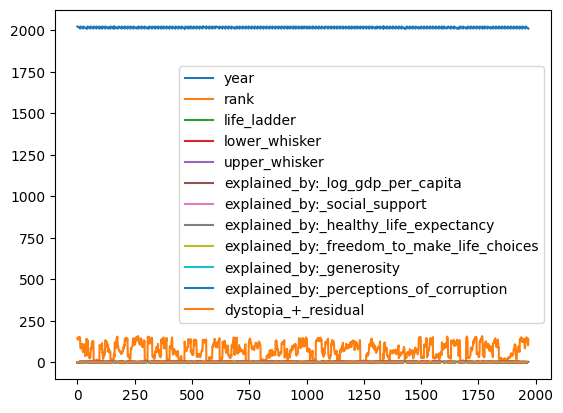

In [35]:
# If the plot doesn’t render, first try re-running this cell. If that doesn’t work, 
# you can restart the kernel (from the Kernel menu above) and try running the notebook again
df.plot()

As you can see, in this case the plot is not very useful. The index does not have any specific meaning, and the values of various columns differ greatly (years are all around 2000, but the values in the other columns are much lower) and thus you cannot see much in the plot. Try setting some parameters of the `.plot()` method to see what it allows you to do. You can find the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

Run the cell below to see a scatter plot with specifically chosen x and y variables. On the x axis there is logarithm of the GDP (measuring the wealth) while on the y axis there is the life ladder. This column contains values which are an estimate of self-assessed life quality on a scale of 1 to 10 as given by a survey among the people.

In [ ]:
df.plot(kind='scatter', x='explained_by:_log_gdp_per_capita', y='life_ladder')

You can see that there is some sort of trend between the wealth of the country and the happiness of the population and you can say that it looks like that wealthier people are to some extent happier. In week three, you will explore this kind of relationship further. 

Sometimes it is very insightful to separate the points by colors to highlight different characteristics or some points you are most interested in. Take a look at the example below

In [ ]:
# Create a dictionary to map the country names to colors
cmap = {
    'Brazil': 'Green',
    'Slovenia': 'Blue',
    'India': 'Red'
}

df.plot(
    kind='scatter',
    x='explained_by:_log_gdp_per_capita',
    y='life_ladder',
    c=[cmap.get(c, 'yellow') for c in df.country_name], # Set the colors
    s=2 # Set the size of the points
    )

You can see that even though in general higher GDP means higher value on the life ladder, this is not an universal truth. Comparing Slovenia (orange) with Brazil (green), you can see that people in Brazil earn less, but are on average happier than Slovenians through the years.

Another very useful task you can do with plots is to visulize the distribution of your data. You will learn how to do this in more detail later, but for example you can easily plot a histogram using Pandas. Ise `DataFrame.hist()` on the dataframe you want to plot. Note that if you have many columns in the dataframe, this command will plot a histogram for each of the columns. You can select a single column from the dataframe if you only want to plot that one.

array([[<Axes: title={'center': 'life_ladder'}>]], dtype=object)

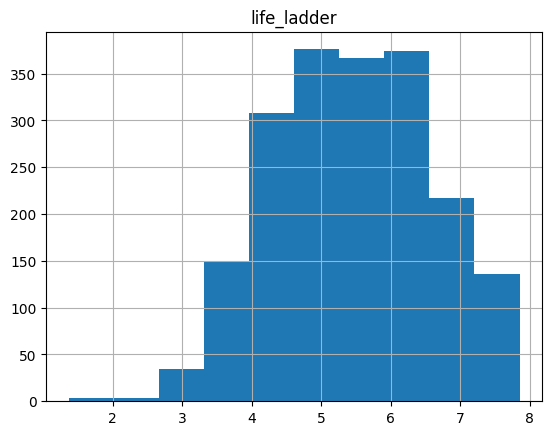

In [36]:
df.hist("life_ladder")

What you see in this histogram is a distribution of values in the "life_ladder" column. What do you think about this distribution on the first glance? Are the people generally happy about their quality of life? Note that to answer this question properly, you need to dig a bit deeper into the data: understand where each value comes from, as the values are not single datapoints (single answers by people), but already aggregated values across countries and at various points in time.

You can use other external libraries to easily produce various advanced plots. One of such libraries is [Seaborn](https://seaborn.pydata.org/). You have already imported it at the beginning of this lab using `import seaborn as sns`. Run the cell below to see one of the many simple and efficient plotting possibilities (you will use this one later on in the other notebooks as well). Since the dataset has many columns it might take a few seconds to run.

In [ ]:
# If the plot doesn’t render, first try re-running this cell. If that doesn’t work, 
# you can restart the kernel (from the Kernel menu above) and try running the notebook again
sns.pairplot(df)

With this kind of plot, you can see pairwise scatter plots for each pair of columns. On the diagonal (where both columns are the same), you don't have a scatter plot (which would only show a line), but a histogram showing the distribution of datapoints.

You can see that both the scatter plots and histograms have very different shapes across columns. Think about various insights you could get from this kind of visualization.

# 6. Operations on Columns
Sometimes the values in the columns are not giving you the information that you need, but there is a way to calculate that information from the values you have.

For example you can create a new column, which is a sum of two columns.

In [ ]:
# Create a new column which is the sum of the year and the value on the life ladder.
df["this_column_makes_no_sense"] = df["year"] + df["life_ladder"]
# Create a new column which is the difference of two columns.
df["net_affect_difference"] = df["positive_affect"] - df["negative_affect"]

df.head()

Above you can see your dataframe with both new columns. The first one doesn't make much sense, it's just adding the year to the life ladder. The second one, however, find the net difference between positive and negative affect. Perhaps there's an interesting set of patterns between this new column and other columns that you'd now be able to explore. What other columns might you want to calculate? In general, the ability to create new columns using operations on existing columns can be a powerful tool.

If you want to perform some more advanced operations on columns, you can use `DataFrame.apply()`, with which you can apply practically any function to a column. Below you can see how to use the `DataFrame.apply()` in various ways. Try to edit `my_function` to perform an operation of your choice.

In [ ]:
# Using df.apply() with a lambda function
# Rescale the life_ladder column to values between 0 and 1 and save it to a new column
df['life_ladder_rescaled'] = df['life_ladder'].apply(lambda x: x / 10)

# Using df.apply() with your own function
# First define a function. The function can do whatever you want. This example will double the column's values
def my_function(x):
    # do stuff to x
    y = x * 2
    return y
# Apply the function.
df['my_function'] = df['life_ladder'].apply(my_function)

# Show the new dataframe
df.head()

**Congratulations on finishing this lab.** If you understand the code above, you are well suited to start working on this week's programming assignment and other labs and assignments throughout the course which use Pandas. If you need a refresher on Pandas in other Exploratory Data Analysis labs, come back to this one and review the skills taught here.